In [1]:
# It imports the Pandas library as "pd" alias and reads a CSV file located at '/content/drive/My Drive/stock_prices.csv' into a DataFrame named "stock_prices_df".
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Define the file path in my Google Drive
file_path = '/content/drive/My Drive/stock_prices.csv'

# Read the CSV file into a DataFrame
stock_prices_df = pd.read_csv(file_path)

In [3]:
# Access the "Close" column of the DataFrame
close_values = stock_prices_df['Close']

# Print the first few values of the "Close" column
print(close_values.head())


print(close_values.describe())

0    2742.0
1     571.0
2    3210.0
3    1550.0
4    3330.0
Name: Close, dtype: float64
count    2.324923e+06
mean     2.594023e+03
std      3.576538e+03
min      1.400000e+01
25%      1.022000e+03
50%      1.811000e+03
75%      3.030000e+03
max      1.095500e+05
Name: Close, dtype: float64


In [4]:
# Define new class intervals based on quartiles or percentiles of Close prices
q1 = stock_prices_df['Close'].quantile(0.25)
q2 = stock_prices_df['Close'].quantile(0.50)
q3 = stock_prices_df['Close'].quantile(0.75)
class_intervals = [(0, q1), (q1, q2), (q2, q3), (q3, stock_prices_df['Close'].max() + 1)]  # Add 1 to include the maximum value

# Define function to assign classes based on target value
def assign_class(value):
    for i, interval in enumerate(class_intervals, start=1):
        if interval[0] <= value < interval[1]:  # Adjust the condition to include values in the third quartile
            return f'Class {i}'
    return 'Outside Range'

# Apply function to assign classes to each data point
stock_prices_df['Class'] = stock_prices_df['Close'].apply(assign_class)

# Display the DataFrame with assigned classes
print(stock_prices_df[['RowId', 'Close', 'Class']])


                 RowId   Close    Class
0        20170104_1301  2742.0  Class 3
1        20170104_1332   571.0  Class 1
2        20170104_1333  3210.0  Class 4
3        20170104_1376  1550.0  Class 2
4        20170104_1377  3330.0  Class 4
...                ...     ...      ...
2332526  20211203_9990   528.0  Class 1
2332527  20211203_9991   794.0  Class 1
2332528  20211203_9993  1645.0  Class 2
2332529  20211203_9994  2389.0  Class 3
2332530  20211203_9997   696.0  Class 1

[2332531 rows x 3 columns]


In [5]:
# Size of the dataset
dataset_size = stock_prices_df.shape
print("Dataset Size:", dataset_size)


Dataset Size: (2332531, 13)


In [6]:
import pandas as pd

# To make my life easier so I don't have to type out a longer variable name
df = stock_prices_df


In [7]:
import pandas as pd

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])


In [9]:

# Check for duplicate records
duplicates = df.duplicated().sum()
print("Number of Duplicate Records:", duplicates)

Number of Duplicate Records: 0


In [9]:
# Check for format inconsistencies in RowId
row_id_format_inconsistencies = df[~df['RowId'].str.match(r'\d{8}_\d{4}$')]
print("Format Inconsistencies in RowId:")
print(row_id_format_inconsistencies)

# Check for format inconsistencies in SecuritiesCode
securities_code_format_inconsistencies = df[~df['SecuritiesCode'].astype(str).str.isdigit()]
print("\nFormat Inconsistencies in SecuritiesCode:")
print(securities_code_format_inconsistencies)

# Check for unexpected values in Open, High, Low, Close
price_columns = ['Open', 'High', 'Low', 'Close']
price_format_inconsistencies = df[~df[price_columns].applymap(lambda x: isinstance(x, (int, float)))].dropna()
print("\nFormat Inconsistencies in Price Columns:")
print(price_format_inconsistencies)

# Check for format inconsistencies in Volume
volume_format_inconsistencies = df[~df['Volume'].astype(str).str.isdigit()]
print("\nFormat Inconsistencies in Volume:")
print(volume_format_inconsistencies)

# Check for unexpected values in AdjustmentFactor
adjustment_factor_format_inconsistencies = df[~df['AdjustmentFactor'].apply(lambda x: isinstance(x, (int, float)))]
print("\nFormat Inconsistencies in AdjustmentFactor:")
print(adjustment_factor_format_inconsistencies)



# Check for unexpected values in Target
Target_inconsistencies = df[~df['Target'].isnull()]
print("\nFormat Inconsistencies in Target:")
print(Target_inconsistencies)



Format Inconsistencies in RowId:
Empty DataFrame
Columns: [RowId, Date, SecuritiesCode, Open, High, Low, Close, Volume, AdjustmentFactor, ExpectedDividend, SupervisionFlag, Target, Class]
Index: []

Format Inconsistencies in SecuritiesCode:
Empty DataFrame
Columns: [RowId, Date, SecuritiesCode, Open, High, Low, Close, Volume, AdjustmentFactor, ExpectedDividend, SupervisionFlag, Target, Class]
Index: []

Format Inconsistencies in Price Columns:
Empty DataFrame
Columns: [RowId, Date, SecuritiesCode, Open, High, Low, Close, Volume, AdjustmentFactor, ExpectedDividend, SupervisionFlag, Target, Class]
Index: []

Format Inconsistencies in Volume:
Empty DataFrame
Columns: [RowId, Date, SecuritiesCode, Open, High, Low, Close, Volume, AdjustmentFactor, ExpectedDividend, SupervisionFlag, Target, Class]
Index: []

Format Inconsistencies in AdjustmentFactor:
Empty DataFrame
Columns: [RowId, Date, SecuritiesCode, Open, High, Low, Close, Volume, AdjustmentFactor, ExpectedDividend, SupervisionFlag, Ta

In [10]:

# Missing Data
missing_data = df.isnull().sum()
print("Missing Data:\n", missing_data)

Missing Data:
 RowId                     0
Date                      0
SecuritiesCode            0
Open                   7608
High                   7608
Low                    7608
Close                  7608
Volume                    0
AdjustmentFactor          0
ExpectedDividend    2313666
SupervisionFlag           0
Target                  238
Class                     0
dtype: int64


In [8]:
df.drop(columns=['ExpectedDividend'], inplace=True)

In [9]:
# Calculate median for each column
median_open = df['Open'].median()
median_high = df['High'].median()
median_low = df['Low'].median()
median_close = df['Close'].median()
median_Target = df['Target'].median()


# Fill missing values with median
df['Open'].fillna(median_open, inplace=True)
df['High'].fillna(median_high, inplace=True)
df['Low'].fillna(median_low, inplace=True)
df['Close'].fillna(median_close, inplace=True)
df['Target'].fillna(median_Target, inplace=True)


In [49]:
# Recheck missingness
print("Missing Data After Imputation:\n", df.isnull().sum())

Missing Data After Imputation:
 RowId               0
Date                0
SecuritiesCode      0
Open                0
High                0
Low                 0
Close               0
Volume              0
AdjustmentFactor    0
SupervisionFlag     0
Target              0
Class               0
dtype: int64


In [10]:
# Define a function to detect outliers based on the IQR method
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

# Apply outlier detection
outliers_open = detect_outliers(df['Open']).sum()
outliers_high = detect_outliers(df['High']).sum()
outliers_low = detect_outliers(df['Low']).sum()
outliers_close = detect_outliers(df['Close']).sum()
outliers_volume = detect_outliers(df['Volume']).sum()
outliers_adjustment_factor = detect_outliers(df['AdjustmentFactor']).sum()


outliers_summary = {
    'Open Outliers': outliers_open,
    'High Outliers': outliers_high,
    'Low Outliers': outliers_low,
    'Close Outliers': outliers_close,
    'Volume Outliers': outliers_volume,
    'AdjustmentFactor Outliers': outliers_adjustment_factor

}

outliers_summary

{'Open Outliers': 145183,
 'High Outliers': 145803,
 'Low Outliers': 144944,
 'Close Outliers': 145371,
 'Volume Outliers': 308239,
 'AdjustmentFactor Outliers': 730}

In [11]:
import pandas as pd



# Summary statistics for the 'Volume' column
volume_stats = df['Volume'].describe()

# Summary statistics for the 'AdjustmentFactor' column
adjustment_factor_stats = df['AdjustmentFactor'].describe()

# Display summary statistics
print("Summary Statistics for Volume Column:")
print(volume_stats)
print("\nSummary Statistics for AdjustmentFactor Column:")
print(adjustment_factor_stats)

# Skewness and kurtosis for both columns
volume_skewness = df['Volume'].skew()
volume_kurtosis = df['Volume'].kurtosis()

adjustment_factor_skewness = df['AdjustmentFactor'].skew()
adjustment_factor_kurtosis = df['AdjustmentFactor'].kurtosis()

print("\nSkewness for Volume Column:", volume_skewness)
print("Kurtosis for Volume Column:", volume_kurtosis)

print("\nSkewness for AdjustmentFactor Column:", adjustment_factor_skewness)
print("Kurtosis for AdjustmentFactor Column:", adjustment_factor_kurtosis)


Summary Statistics for Volume Column:
count    2.332531e+06
mean     6.919366e+05
std      3.911256e+06
min      0.000000e+00
25%      3.030000e+04
50%      1.071000e+05
75%      4.021000e+05
max      6.436540e+08
Name: Volume, dtype: float64

Summary Statistics for AdjustmentFactor Column:
count    2.332531e+06
mean     1.000508e+00
std      6.773040e-02
min      1.000000e-01
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.000000e+01
Name: AdjustmentFactor, dtype: float64

Skewness for Volume Column: 36.042606002811546
Kurtosis for Volume Column: 2368.1649879155293

Skewness for AdjustmentFactor Column: 122.99565467169053
Kurtosis for AdjustmentFactor Column: 17008.27380321588


In [12]:
# Removing outliers from volume column

#Step 1: Calculate IQR
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter DataFrame to exclude outliers
df_filtered = df[(df['Volume'] >= lower_bound) & (df['Volume'] <= upper_bound)]




In [16]:
# Summary statistics before outlier removal
print("Summary Statistics for Volume Column (Before):")
print(df['Volume'].describe())

# Summary statistics after outlier removal
print("\nSummary Statistics for Volume Column (After):")
print(df_filtered['Volume'].describe())

Summary Statistics for Volume Column (Before):
count    2.332531e+06
mean     6.919366e+05
std      3.911256e+06
min      0.000000e+00
25%      3.030000e+04
50%      1.071000e+05
75%      4.021000e+05
max      6.436540e+08
Name: Volume, dtype: float64

Summary Statistics for Volume Column (After):
count    2.024292e+06
mean     1.686656e+05
std      2.117761e+05
min      0.000000e+00
25%      2.470000e+04
50%      7.830000e+04
75%      2.249000e+05
max      9.598000e+05
Name: Volume, dtype: float64


In [13]:
import numpy as np

# Log transformation for Volume column
df['Volume_Log'] = np.log(df['Volume'])

# Display the first few rows to show all columns including the log-transformed Volume
print(df.head())

           RowId       Date  SecuritiesCode    Open    High     Low   Close  \
0  20170104_1301 2017-01-04            1301  2734.0  2755.0  2730.0  2742.0   
1  20170104_1332 2017-01-04            1332   568.0   576.0   563.0   571.0   
2  20170104_1333 2017-01-04            1333  3150.0  3210.0  3140.0  3210.0   
3  20170104_1376 2017-01-04            1376  1510.0  1550.0  1510.0  1550.0   
4  20170104_1377 2017-01-04            1377  3270.0  3350.0  3270.0  3330.0   

    Volume  AdjustmentFactor  SupervisionFlag    Target    Class  Volume_Log  
0    31400               1.0            False  0.000730  Class 3   10.354563  
1  2798500               1.0            False  0.012324  Class 1   14.844594  
2   270800               1.0            False  0.006154  Class 4   12.509136  
3    11300               1.0            False  0.011053  Class 2    9.332558  
4   150800               1.0            False  0.003026  Class 4   11.923710  


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [14]:
# Min-Max Scaling (Normalization)
def min_max_scaling(feature):
    min_val = feature.min()
    max_val = feature.max()
    return (feature - min_val) / (max_val - min_val)

# Z-score Normalization (Standardization)
def z_score_normalization(feature):
    mean = feature.mean()
    std_dev = feature.std()
    return (feature - mean) / std_dev

# Apply Min-Max Scaling and Z-score Normalization to the dataset
normalized_df = pd.DataFrame()
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        normalized_df[col + '_minmax'] = min_max_scaling(df[col])
        normalized_df[col + '_zscore'] = z_score_normalization(df[col])

# Display the normalized dataset
print(normalized_df.head())

   SecuritiesCode_minmax  SecuritiesCode_zscore  Open_minmax  Open_zscore  \
0               0.000000              -1.910785     0.024742     0.039769   
1               0.003565              -1.897891     0.005039    -0.566676   
2               0.003680              -1.897475     0.028526     0.156243   
3               0.008625              -1.879589     0.013608    -0.302931   
4               0.008740              -1.879173     0.029617     0.189841   

   High_minmax  High_zscore  Low_minmax  Low_zscore  Close_minmax  \
0     0.024800     0.036263    0.025348    0.048551      0.024905   
1     0.005078    -0.566714    0.005131   -0.565678      0.005085   
2     0.028918     0.162171    0.029173    0.164764      0.029178   
3     0.013893    -0.297187    0.013966   -0.297254      0.014023   
4     0.030185     0.200913    0.030386    0.201612      0.030273   

   Close_zscore  Volume_minmax  Volume_zscore  AdjustmentFactor_minmax  \
0      0.042154       0.000049      -0.168881   

In [15]:
# One-hot encode categorical features
encoded_df = pd.get_dummies(df, columns=['SupervisionFlag'])

# Display the encoded DataFrame
print(encoded_df.head())


           RowId       Date  SecuritiesCode    Open    High     Low   Close  \
0  20170104_1301 2017-01-04            1301  2734.0  2755.0  2730.0  2742.0   
1  20170104_1332 2017-01-04            1332   568.0   576.0   563.0   571.0   
2  20170104_1333 2017-01-04            1333  3150.0  3210.0  3140.0  3210.0   
3  20170104_1376 2017-01-04            1376  1510.0  1550.0  1510.0  1550.0   
4  20170104_1377 2017-01-04            1377  3270.0  3350.0  3270.0  3330.0   

    Volume  AdjustmentFactor    Target    Class  Volume_Log  \
0    31400               1.0  0.000730  Class 3   10.354563   
1  2798500               1.0  0.012324  Class 1   14.844594   
2   270800               1.0  0.006154  Class 4   12.509136   
3    11300               1.0  0.011053  Class 2    9.332558   
4   150800               1.0  0.003026  Class 4   11.923710   

   SupervisionFlag_False  SupervisionFlag_True  
0                   True                 False  
1                   True                 False  

In [16]:
# Drop the specified columns
df = df.drop(columns=['RowId', 'SupervisionFlag'])

In [57]:
import pandas as pd

# Assuming df is your DataFrame
data_types = df.dtypes

# Print data types along with column names
print("Data Types:")
print(data_types)


Data Types:
Date                datetime64[ns]
SecuritiesCode               int64
Open                       float64
High                       float64
Low                        float64
Close                      float64
Volume                       int64
AdjustmentFactor           float64
Target                     float64
Class                       object
Volume_Log                 float64
dtype: object


In [17]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Class' column and store the encoded values in a new column 'Class_encoded'
stock_prices_df['Class_encoded'] = label_encoder.fit_transform(stock_prices_df['Class'])

# Display the DataFrame with encoded classes
print(stock_prices_df[['RowId', 'Close', 'Class', 'Class_encoded']])

# Drop the original 'Class' column
stock_prices_df = stock_prices_df.drop(columns=['Class'])

# Verify column names after dropping 'Class'
print(stock_prices_df.columns)



                 RowId   Close    Class  Class_encoded
0        20170104_1301  2742.0  Class 3              2
1        20170104_1332   571.0  Class 1              0
2        20170104_1333  3210.0  Class 4              3
3        20170104_1376  1550.0  Class 2              1
4        20170104_1377  3330.0  Class 4              3
...                ...     ...      ...            ...
2332526  20211203_9990   528.0  Class 1              0
2332527  20211203_9991   794.0  Class 1              0
2332528  20211203_9993  1645.0  Class 2              1
2332529  20211203_9994  2389.0  Class 3              2
2332530  20211203_9997   696.0  Class 1              0

[2332531 rows x 4 columns]
Index(['RowId', 'Date', 'SecuritiesCode', 'Open', 'High', 'Low', 'Close',
       'Volume', 'AdjustmentFactor', 'SupervisionFlag', 'Target', 'Volume_Log',
       'Class_encoded'],
      dtype='object')


In [18]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Class' column
df['Class_encoded'] = label_encoder.fit_transform(df['Class'])


In [19]:
# Drop the 'Class' column
df = df.drop(columns=['Class'])


In [20]:
import math

# Calculate the total number of samples
N_total = df.shape[0]

# Specify the proportions for training, validation, and testing sets
train_ratio = 0.8
val_ratio = 0.1  # Splitting the remaining data equally for validation and testing
test_ratio = 0.1

# Calculate the number of samples for each set
N_train = math.floor(train_ratio * N_total)
N_val = math.floor(val_ratio * N_total)
N_test = N_total - N_train - N_val

# Split the dataset into training, validation, and testing sets
X_train = df.iloc[:N_train, :-1]  # Assuming the last column is the target column
y_train = df.iloc[:N_train, -1]   # Assuming the last column is the target column

X_val = df.iloc[N_train:N_train + N_val, :-1]
y_val = df.iloc[N_train:N_train + N_val, -1]

X_test = df.iloc[N_train + N_val:, :-1]
y_test = df.iloc[N_train + N_val:, -1]

# Print the number of samples in the validation set
print("Number of samples in the validation set:", N_val)

Number of samples in the validation set: 233253


In [21]:
N_train

1866024

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
X_train.shape[1]

10

In [24]:
# 1st Hidden layer
X_train.shape[1]*12 + 12

132

In [25]:
# 2nd Hidden layer
12 * 8 + 8

104

In [26]:
# 3rd Hidden layer
8 * 8 + 8

72

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                132       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 317 (1.24 KB)
Trainable params: 317 (1.24 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
from keras.models import Model
from keras.layers import Dense, Input

in_x = Input(shape = X_train.shape[1:])
x = Dense(12, input_dim=X_train.shape[1], activation='relu')(in_x)
x = Dense(8, activation='relu')(x)
x = Dense(8, activation='relu')(x)
out_x = Dense(1, activation='sigmoid')(x)

model = Model(in_x,out_x)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_4 (Dense)             (None, 12)                132       
                                                                 
 dense_5 (Dense)             (None, 8)                 104       
                                                                 
 dense_6 (Dense)             (None, 8)                 72        
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 317 (1.24 KB)
Trainable params: 317 (1.24 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
from keras.activations import relu
import keras

in_x = Input(shape = X_train.shape[1:])
x = keras.layers.Normalization(axis=-1)(in_x)
x = Dense(12, input_dim=X_train.shape[1], activation='relu')(in_x)
x = Dense(8)(x)
x = relu(x)
out_x = Dense(1, activation='sigmoid')(x)

model = Model(in_x,out_x)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_8 (Dense)             (None, 12)                132       
                                                                 
 dense_9 (Dense)             (None, 8)                 104       
                                                                 
 tf.nn.relu (TFOpLambda)     (None, 8)                 0         
                                                                 
 dense_10 (Dense)            (None, 1)                 9         
                                                                 
Total params: 245 (980.00 Byte)
Trainable params: 245 (980.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Drop timestamp columns from X_train and X_Test
X_train_numeric = X_train.drop(columns=['timestamp_column1', 'timestamp_column2', ...], errors='ignore')
X_test_numeric = X_test.drop(columns=['timestamp_column1', 'timestamp_column2', ...], errors='ignore')

# Convert all columns to numeric (excluding the timestamp columns)
X_train_numeric = X_train_numeric.apply(pd.to_numeric, errors='ignore')
X_test_numeric = X_test_numeric.apply(pd.to_numeric, errors='ignore')

# Convert to NumPy array and cast to float
X_train_numeric_array = X_train_numeric.to_numpy().astype("float")
X_test_numeric_array = X_test_numeric.to_numpy().astype("float")

# Train the model
history = model.fit(X_train_numeric_array,
                    y_train.to_numpy().astype("float"),
                    validation_data=(X_test_numeric_array, y_test.to_numpy().astype("float")),
                    epochs=100,
                    batch_size=10)


Epoch 1/100
186603/186603 [==============================] - 389s 2ms/step - loss: nan - accuracy: 0.2538 - val_loss: nan - val_accuracy: 0.2279
Epoch 2/100
186603/186603 [==============================] - 381s 2ms/step - loss: nan - accuracy: 0.2538 - val_loss: nan - val_accuracy: 0.2279
Epoch 3/100
186603/186603 [==============================] - 383s 2ms/step - loss: nan - accuracy: 0.2538 - val_loss: nan - val_accuracy: 0.2279
Epoch 4/100
186603/186603 [==============================] - 373s 2ms/step - loss: nan - accuracy: 0.2538 - val_loss: nan - val_accuracy: 0.2279
Epoch 5/100
186603/186603 [==============================] - 373s 2ms/step - loss: nan - accuracy: 0.2538 - val_loss: nan - val_accuracy: 0.2279
Epoch 6/100
186603/186603 [==============================] - 397s 2ms/step - loss: nan - accuracy: 0.2538 - val_loss: nan - val_accuracy: 0.2279
Epoch 7/100
186603/186603 [==============================] - 384s 2ms/step - loss: nan - accuracy: 0.2538 - val_loss: nan - val_ac

In [33]:
# Drop timestamp columns from X_train and X_Test
X_train_numeric = X_train.drop(columns=['timestamp_column1', 'timestamp_column2', ...], errors='ignore')
X_test_numeric = X_test.drop(columns=['timestamp_column1', 'timestamp_column2', ...], errors='ignore')

# Convert all columns to numeric (excluding the timestamp columns)
X_train_numeric = X_train_numeric.apply(pd.to_numeric, errors='ignore')
X_test_numeric = X_test_numeric.apply(pd.to_numeric, errors='ignore')

# Convert to NumPy array and cast to float
X_train_numeric_array = X_train_numeric.to_numpy().astype("float")
X_test_numeric_array = X_test_numeric.to_numpy().astype("float")

# Continue training the model from epoch 58 to epoch 100
history = model.fit(X_train_numeric_array,
                    y_train.to_numpy().astype("float"),
                    validation_data=(X_test_numeric_array, y_test.to_numpy().astype("float")),
                    epochs=100,
                    initial_epoch=57,  # Start from epoch 58
                    batch_size=10)





Epoch 58/100
186603/186603 [==============================] - 519s 3ms/step - loss: nan - accuracy: 0.2538 - val_loss: nan - val_accuracy: 0.2279
Epoch 59/100
186603/186603 [==============================] - 508s 3ms/step - loss: nan - accuracy: 0.2538 - val_loss: nan - val_accuracy: 0.2279
Epoch 60/100
186603/186603 [==============================] - 478s 3ms/step - loss: nan - accuracy: 0.2538 - val_loss: nan - val_accuracy: 0.2279
Epoch 61/100
186603/186603 [==============================] - 474s 3ms/step - loss: nan - accuracy: 0.2538 - val_loss: nan - val_accuracy: 0.2279
Epoch 62/100
186603/186603 [==============================] - 482s 3ms/step - loss: nan - accuracy: 0.2538 - val_loss: nan - val_accuracy: 0.2279
Epoch 63/100
186603/186603 [==============================] - 474s 3ms/step - loss: nan - accuracy: 0.2538 - val_loss: nan - val_accuracy: 0.2279
Epoch 64/100
186603/186603 [==============================] - 496s 3ms/step - loss: nan - accuracy: 0.2538 - val_loss: nan -

In [34]:

print (history.history)

{'loss': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], 'accuracy': [0.2538290023803711, 0.2538290023803711, 0.2538290023803711, 0.2538290023803711, 0.2538290023803711, 0.2538290023803711, 0.2538290023803711, 0.2538290023803711, 0.2538290023803711, 0.2538290023803711, 0.2538290023803711, 0.2538290023803711, 0.2538290023803711, 0.2538290023803711, 0.2538290023803711, 0.2538290023803711, 0.2538290023803711, 0.2538290023803711, 0.2538290023803711, 0.2538290023803711, 0.2538290023803711, 0.2538290023803711, 0.2538290023803711, 0.2538290023803711, 0.2538290023803711, 0.2538290023803711, 0.2538290023803711, 0.2538290023803711, 0.2538290023803711, 0.2538290023803711, 0.2538290023803711, 0.2538290023803711, 0.2538290023803711, 0.2538290023803711, 0.2538290023803711, 0.2538290023803711, 0.2538290023803711, 0.2538290023803711, 0

In [36]:
import matplotlib.pyplot as plt

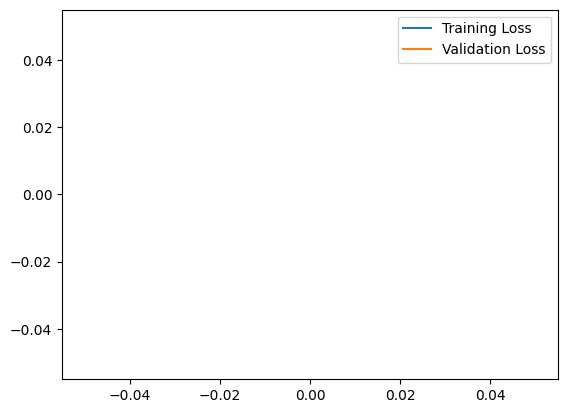

In [37]:
plt.plot(range(len(history.history["loss"])),history.history["loss"],label="Training Loss")
plt.plot(range(len(history.history["val_loss"])),history.history["val_loss"],label="Validation Loss")
plt.legend()

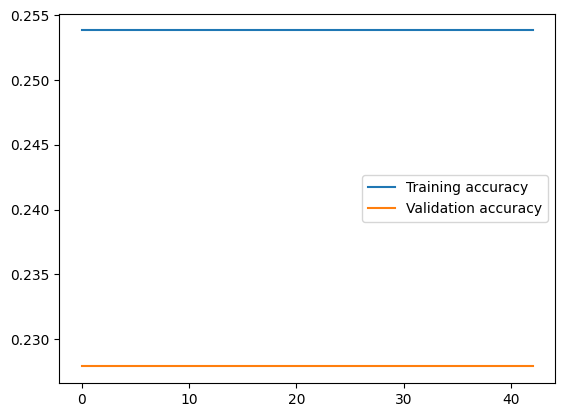

In [38]:
plt.plot(range(len(history.history["accuracy"])),history.history["accuracy"],label="Training accuracy")
plt.plot(range(len(history.history["val_accuracy"])),history.history["val_accuracy"],label="Validation accuracy")
plt.legend()

In [46]:
scores = model.evaluate(X_test, y_test)
print(scores)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type Timestamp).

In [50]:
import pandas as pd

# Convert "date" column to Unix timestamp
X_test['Date'] = pd.to_datetime(X_test['Date']).astype(int) / 10**9

# Proceed with model evaluation
scores = model.evaluate(X_test, y_test)
print(scores)


7290/7290 [==============================] - 14s 2ms/step - loss: nan - accuracy: 0.2279
[nan, 0.22787605226039886]


In [52]:
model.predict(X_test)

7290/7290 [==============================] - 15s 2ms/step


array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

In [54]:
X_test_0 = X_test[(y_test==0).to_numpy()]
X_test_1 = X_test[(y_test==1).to_numpy()]

1662/1662 [==============================] - 8s 5ms/step


/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:6762: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

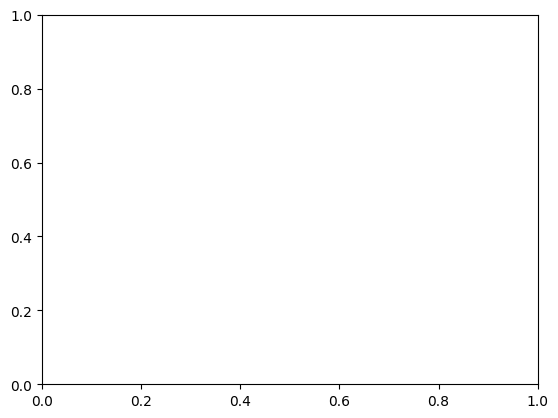

In [56]:
hist,bins,_= plt.hist(model.predict(X_test_0),density=1,bins=50,alpha=0.5,label="Target 0")
hist,bins,_= plt.hist(model.predict(X_test_1),density=1,bins=bins,alpha=0.5,label="Target 1")
plt.legend()

1744/1744 [==============================] - 3s 2ms/step


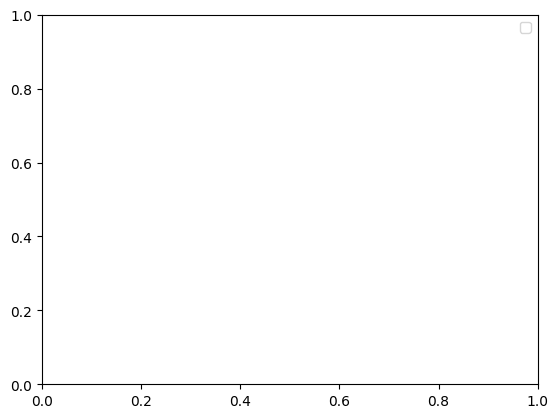

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Check for NaN values in predictions for target 0
predictions_0 = model.predict(X_test_0)
if np.isnan(predictions_0).any():
    print("Warning: NaN values found in predictions for target 0.")
else:
    hist, bins, _ = plt.hist(predictions_0, density=1, bins=50, alpha=0.5, label="Target 0")

# Check for NaN values in predictions for target 1
predictions_1 = model.predict(X_test_1)
if np.isnan(predictions_1).any():
    print("Warning: NaN values found in predictions for target 1.")
else:
    hist, bins, _ = plt.hist(predictions_1, density=1, bins=bins, alpha=0.5, label="Target 1")

plt.legend()
plt.show()


In [61]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, model.predict(X_test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

7290/7290 [==============================] - 17s 2ms/step


ValueError: multiclass format is not supported

In [64]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Saved Models.hdfs')

In [ ]:
# Comparison with my previous model

In [62]:
import numpy as np

# Define the Node class for the Decision Tree
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature  # Feature index for splitting
        self.threshold = threshold  # Threshold for splitting
        self.left = left  # Left child node
        self.right = right  # Right child node
        self.value = value  # Value for leaf nodes

# Define the Decision Tree class
class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def fit(self, X, y):
        self.root = self._grow_tree(X, y.astype(int))


    def predict(self, X):
        return np.array([self._predict_row(x, self.root) for x in X])

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))

        # Stopping criteria
        if (self.max_depth is not None and depth >= self.max_depth) or n_classes == 1 or n_samples < self.min_samples_split:
            value = np.bincount(y).argmax()
            return Node(value=value)

        # Find the best split
        best_gini = float('inf')
        best_feature, best_threshold = None, None
        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = np.where(X[:, feature] <= threshold)[0]
                right_indices = np.where(X[:, feature] > threshold)[0]

                if len(left_indices) == 0 or len(right_indices) == 0:
                    continue

                gini = self._gini_impurity(y[left_indices], y[right_indices])
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold

        # Split the dataset
        left_indices = np.where(X[:, best_feature] <= best_threshold)[0]
        right_indices = np.where(X[:, best_feature] > best_threshold)[0]
        left_child = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right_child = self._grow_tree(X[right_indices], y[right_indices], depth + 1)

        return Node(feature=best_feature, threshold=best_threshold, left=left_child, right=right_child)

    def _predict_row(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self._predict_row(x, node.left)
        else:
            return self._predict_row(x, node.right)

    def _gini_impurity(self, left_y, right_y):
        n = len(left_y) + len(right_y)
        p_left = len(left_y) / n
        p_right = len(right_y) / n
        return p_left * self._calc_gini(left_y) + p_right * self._calc_gini(right_y)

    def _calc_gini(self, y):
        if len(y) == 0:
            return 0
        p = np.bincount(np.round(y).astype(int)) / len(y)
        return 1 - np.sum(p ** 2)


# Define the size of the test set (e.g., 20% of the total data)
test_size = 0.2

# Split the data into training and test sets
train_data = df.sample(frac=1-test_size, random_state=42)  # Use 80% of the data for training
test_data = df.drop(train_data.index)  # Use the remaining 20% for testing

# Example usage:
# Instantiate and train the model
tree = DecisionTree(max_depth=3)
X_train = train_data.drop(columns=['Close']).values
y_train = train_data['Close'].values
tree.fit(X_train, y_train)

# Make predictions
X_test = test_data.drop(columns=['Close']).values
predictions = tree.predict(X_test)
print(predictions)

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np

# Define the Node class for the Decision Tree
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature  # Feature index for splitting
        self.threshold = threshold  # Threshold for splitting
        self.left = left  # Left child node
        self.right = right  # Right child node
        self.value = value  # Value for leaf nodes

# Define the Decision Tree class
class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def fit(self, X, y):
        self.root = self._grow_tree(X, y.astype(int))

    def predict(self, X):
        return np.array([self._predict_row(x, self.root) for x in X])

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))

        # Stopping criteria
        if (self.max_depth is not None and depth >= self.max_depth) or n_classes == 1 or n_samples < self.min_samples_split:
            value = np.bincount(y).argmax()
            return Node(value=value)

        # Find the best split
        best_gini = float('inf')
        best_feature, best_threshold = None, None
        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = np.where(X[:, feature] <= threshold)[0]
                right_indices = np.where(X[:, feature] > threshold)[0]

                if len(left_indices) == 0 or len(right_indices) == 0:
                    continue

                gini = self._gini_impurity(y[left_indices], y[right_indices])
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold

        # Split the dataset
        left_indices = np.where(X[:, best_feature] <= best_threshold)[0]
        right_indices = np.where(X[:, best_feature] > best_threshold)[0]
        left_child = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right_child = self._grow_tree(X[right_indices], y[right_indices], depth + 1)

        return Node(feature=best_feature, threshold=best_threshold, left=left_child, right=right_child)

    def _predict_row(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self._predict_row(x, node.left)
        else:
            return self._predict_row(x, node.right)

    def _gini_impurity(self, left_y, right_y):
        n = len(left_y) + len(right_y)
        p_left = len(left_y) / n
        p_right = len(right_y) / n
        return p_left * self._calc_gini(left_y) + p_right * self._calc_gini(right_y)

    def _calc_gini(self, y):
        if len(y) == 0:
            return 0
        p = np.bincount(np.round(y).astype(int)) / len(y)
        return 1 - np.sum(p ** 2)


import pandas as pd
import numpy as np

# Assuming 'df' contains your DataFrame with the 'Close' column
# Instantiate and train the model
tree = DecisionTree(max_depth=3)
X_train = train_data.drop(columns=['Close']).values
y_train = train_data['Close'].values
tree.fit(X_train, y_train)

# Make predictions
X_test = test_data.drop(columns=['Close']).values
predictions = tree.predict(X_test)

# Create a DataFrame to store predictions
predictions_df = pd.DataFrame()

# Assign 'Date' column from 'test_data' to the predictions DataFrame
predictions_df['Date'] = test_data['Date']

# Reset index to start from 0
predictions_df.reset_index(drop=True, inplace=True)

# Assign the predicted values to the 'Close' column
predictions_df['Close'] = predictions

# Add a placeholder for the 'Rank' column (you'll compute it later)
predictions_df['Rank'] = np.arange(len(predictions_df))

# Now predictions_df should have the required structure
print(predictions_df.head())

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(test_data['Close'] - predictions))

# Calculate Mean Squared Error (MSE)
mse = np.mean((test_data['Close'] - predictions) ** 2)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'], test_data['Close'], label='Actual Close')
plt.plot(test_data['Date'], predictions, label='Predicted Close')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices')
plt.legend()
plt.show()

Applying ML to the Challenge Data Set

In [ ]:

# Make predictions on the test data
X_test = test_data.drop(columns=['Close']).values
predictions_test = tree.predict(X_test)

# Display the predictions
print(predictions_test)

In [ ]:
# Make predictions on the test data
X_test = test_data.drop(columns=['Close']).values
y_test = test_data['Close'].values
predictions_test = tree.predict(X_test)

# Evaluate model performance
def accuracy_score(y_true, y_pred):
    """Compute the accuracy score."""
    correct = sum(y_true == y_pred)
    total = len(y_true)
    return correct / total

accuracy = accuracy_score(y_test, predictions_test)
print("Accuracy on test set:", accuracy)

Conclusion:
